In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
print("Pass 1")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Pass 1


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from PIL import Image

import torchvision
from torchvision import datasets, transforms
print("Pass 1")

Pass 1


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [4]:
import os
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd

class GravexDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

        print("Dataset root:", img_dir)
        print("Folders:", os.listdir(img_dir))
        print("Total rows:", len(self.df))

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # correct label (mappings to images)
        if row["label"] == 1:
            folder = "real" 
        else:
            folder = "ai_images" # label == 0 for ai images

        img_path = os.path.join(self.img_dir, folder, row["filename"])

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Missing image: {img_path}")

        image = Image.open(img_path).convert("RGB")
        label = int(row["label"])

        if self.transform:
            image = self.transform(image)

        return image, label
print("Pass ")

Pass 


In [3]:
temp = pd.read_csv("/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/test_labels.csv")
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   filename    20000 non-null  object
 2   label       20000 non-null  int64 
 3   resolution  20000 non-null  object
 4   image_size  20000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 781.4+ KB


In [4]:
temp["label"].unique()

array([1, 0])

In [7]:
train_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
print("Pass 3")

Pass 3


In [29]:
train_ds = GravexDataset(
    csv_file="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/train_labels.csv",
    img_dir="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset",
    transform=train_tfms
)

val_ds = GravexDataset(
    csv_file="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/val_labels.csv",
    img_dir="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset",
    transform=val_tfms
)
print("Pass 4")

Dataset root: /kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset
Folders: ['ai_images', 'augmentation_log.csv', 'real']
Total rows: 140000
Dataset root: /kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset
Folders: ['ai_images', 'augmentation_log.csv', 'real']
Total rows: 40000
Pass 4


In [30]:
print("Train size:", len(train_ds))
print("Val size:", len(val_ds))

img, lbl = train_ds[0]
print(img.shape, lbl)

Train size: 140000
Val size: 40000
torch.Size([3, 224, 224]) 1


In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/train_labels.csv")
print(df.head())
print(df.columns)


   Unnamed: 0   filename  label resolution  image_size
0           0  03428.jpg      1    256x256       65536
1           1  38472.jpg      1    256x256       65536
2           2  49600.jpg      1    256x256       65536
3           3  68452.jpg      1    256x256       65536
4           4  60461.jpg      1    256x256       65536
Index(['Unnamed: 0', 'filename', 'label', 'resolution', 'image_size'], dtype='object')


In [2]:
import os

base = "/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset"
print(os.listdir(base))


['ai_images', 'augmentation_log.csv', 'real']


In [ ]:
# train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
# val_loader = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

In [36]:


def save_real_image_filenames(real_dir, output_csv):
    """
    Saves all image filenames from the REAL folder into a CSV.
    
    Args:
        real_dir (str): Path to the 'real' images directory
        output_csv (str): Path where CSV will be saved
    """
    filenames = []

    for fname in os.listdir(real_dir):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            filenames.append(fname)

    df = pd.DataFrame({"filename": filenames})
    df.to_csv(output_csv, index=False)

    print(f"Saved {len(df)} REAL image filenames to {output_csv}")

real_dir = "/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset/ai_images"
output_csv = "/kaggle/working/real_image_filenames_fake.csv"

save_real_image_filenames(real_dir, output_csv)

Saved 100000 REAL image filenames to /kaggle/working/real_image_filenames_fake.csv


In [38]:
# weights = EfficientNet_B0_Weights.DEFAULT
# model = efficientnet_b0(weights=weights)


def build_filename_lookup(train_csv, val_csv, test_csv):
    """
    Loads train, val, test CSVs and builds a fast lookup set of filenames.
    
    Returns:
        A function you can call with a filename → True / False
    """
    all_filenames = set()

    for csv_path in [train_csv, val_csv, test_csv]:
        df = pd.read_csv(csv_path)
        all_filenames.update(df["filename"].astype(str))

    print(f"Loaded {len(all_filenames)} unique filenames from CSVs")

    def exists(filename):
        return filename in all_filenames

    return exists
print("Pass 11")

Pass 11


In [39]:
filename_exists = build_filename_lookup(
    train_csv="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/train_labels.csv",
    val_csv="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/val_labels.csv",
    test_csv="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/test_labels.csv"
)
print("Pass 12")


Loaded 200000 unique filenames from CSVs
Pass 12


In [21]:
# NUM_CLASSES = 2
# model.classifier[1] = nn.Linear(model.classifier[1].in_features, NUM_CLASSES)
print(filename_exists("celebdf_val_id50_0007_frame0_face1.jpg")) 

True


In [ ]:
# Move model to device
# model = model.to(device)

In [ ]:
# optimizer = optim.AdamW(model.parameters(), lr=1e-4)
# criterion = nn.CrossEntropyLoss()

In [34]:
BEST_MODEL_PATH = "/kaggle/working/best_efficientnet_b0.pth"
print("Pass 14")

Pass 14


In [35]:
EPOCHS = 5  

def objective(trial):
    # Hyperparameters to tune
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    dropout_rate = trial.suggest_uniform("dropout", 0.0, 0.5)

 
    # Datasets & DataLoaders
    train_loader = DataLoader(
        train_ds, batch_size=batch_size, shuffle=True, num_workers=2
    )
    val_loader = DataLoader(
        val_ds, batch_size=batch_size, shuffle=False, num_workers=2
    )

     
    # Model
    weights = EfficientNet_B0_Weights.DEFAULT
    model = efficientnet_b0(weights=weights)

    in_features = model.classifier[1].in_features
    model.classifier[1] = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(in_features, 2)
    )

    model.to(device)

    
    # Optimizer & Loss
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # Training loop  
    TRIAL_EPOCHS = 2
    for epoch in range(TRIAL_EPOCHS):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

     
    # Validation
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total

    
    # saving the best model 
    if trial.number == 0 or val_acc > trial.study.best_value:
        torch.save(
            {
                "model_state_dict": model.state_dict(),
                "lr": lr,
                "batch_size": batch_size,
                "dropout": dropout_rate,
                "val_accuracy": val_acc
            },
            BEST_MODEL_PATH
        )

    return val_acc
print("Print 13")

Print 13


In [5]:
import optuna
print("Pass 6")

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


Pass 6


In [ ]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

# Create Optuna study
study = optuna.create_study(direction="maximize")  # maximize val accuracy
study.optimize(objective, n_trials=10)  # number of trials 

# Print best hyperparameters
print("Best trial:")
trial = study.best_trial
print("  Value (Validation Accuracy):", trial.value)
print("  Params:", trial.params)
print()

[I 2025-12-26 07:37:43,098] A new study created in memory with name: no-name-123229de-d3ab-4219-9b28-b8ddf80b63c1
[I 2025-12-26 07:58:32,852] Trial 0 finished with value: 0.949 and parameters: {'lr': 0.00020496391489113937, 'batch_size': 16, 'dropout': 0.07065771068377114}. Best is trial 0 with value: 0.949.
[I 2025-12-26 08:19:42,570] Trial 1 finished with value: 0.95005 and parameters: {'lr': 5.161735344771087e-05, 'batch_size': 16, 'dropout': 0.14816146195717222}. Best is trial 1 with value: 0.95005.
[I 2025-12-26 08:40:39,363] Trial 2 finished with value: 0.9536 and parameters: {'lr': 0.0001224675995143253, 'batch_size': 16, 'dropout': 0.39527692254768765}. Best is trial 2 with value: 0.9536.
[I 2025-12-26 08:57:50,438] Trial 3 finished with value: 0.94495 and parameters: {'lr': 0.00025907629879410275, 'batch_size': 64, 'dropout': 0.46839203010018815}. Best is trial 2 with value: 0.9536.
[I 2025-12-26 09:16:27,269] Trial 4 finished with value: 0.933025 and parameters: {'lr': 0.0008

In [8]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
 
# Load best model for inference
 
weights = EfficientNet_B0_Weights.DEFAULT
model = efficientnet_b0(weights=weights)
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Sequential(
    nn.Dropout(0.0),  # for inference
    nn.Linear(in_features, 2)
)
checkpoint = torch.load("/kaggle/input/deepfakemodel/pytorch/default/1/best_efficientnet_b0.pth", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()
model.to(device)

 
# Test set inference
 
test_ds = GravexDataset(
    csv_file="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/test_labels.csv",
    img_dir="/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset",
    transform=val_tfms
)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

all_preds = []
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())

print("Sample predictions:", all_preds[:10])


Dataset root: /kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset
Folders: ['ai_images', 'augmentation_log.csv', 'real']
Total rows: 20000
Sample predictions: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


In [20]:
 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

 
# Metrics
 
accuracy  = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, pos_label=1)
recall    = recall_score(all_labels, all_preds, pos_label=1)
f1        = f1_score(all_labels, all_preds, pos_label=1)

print("Test Metrics")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

print("\n Classification Report:")
print(classification_report(
    all_labels,
    all_preds,
    target_names=["AI (0)", "REAL (1)"]
))

print("\n Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


Test Metrics
Accuracy : 0.9564
Precision: 0.9511
Recall   : 0.9623
F1-score : 0.9567

 Classification Report:
              precision    recall  f1-score   support

      AI (0)       0.96      0.95      0.96     10000
    REAL (1)       0.95      0.96      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000


 Confusion Matrix:
[[9505  495]
 [ 377 9623]]


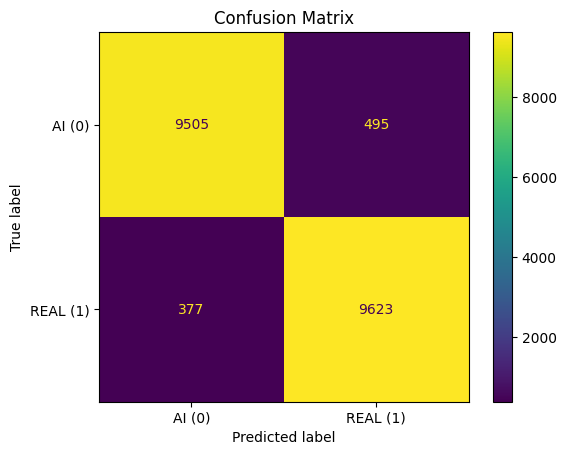

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["AI (0)", "REAL (1)"]
)

disp.plot(cmap=None)
plt.title("Confusion Matrix")
plt.show()


# GET IMAGES

In [25]:
import os
import shutil
import pandas as pd
import random

In [29]:
TEST_CSV = "/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/test_labels.csv"
IMG_ROOT = "/kaggle/input/200k-real-vs-ai-visuals-by-mbilal/my_real_vs_ai_dataset/my_real_vs_ai_dataset"

OUTPUT_DIR = "/kaggle/working/sample_test_images"
REAL_OUT = os.path.join(OUTPUT_DIR, "real")
AI_OUT = os.path.join(OUTPUT_DIR, "ai_images")

os.makedirs(REAL_OUT, exist_ok=True)
os.makedirs(AI_OUT, exist_ok=True)


In [28]:
df = pd.read_csv(TEST_CSV)

real_df = df[df["label"] == 1].sample(10, random_state=42)
ai_df   = df[df["label"] == 0].sample(10, random_state=42)

sample_df = pd.concat([real_df, ai_df]).reset_index(drop=True)
print("Sample size:", len(sample_df))


Sample size: 20


In [30]:
saved_rows = []

for _, row in sample_df.iterrows():
    filename = row["filename"]
    label = row["label"]

    if label == 1:
        src = os.path.join(IMG_ROOT, "real", filename)
        dst = os.path.join(REAL_OUT, filename)
    else:
        src = os.path.join(IMG_ROOT, "ai_images", filename)
        dst = os.path.join(AI_OUT, filename)

    if os.path.exists(src):
        shutil.copy(src, dst)
        saved_rows.append({"filename": filename, "label": label})
    else:
        print("Missing:", src)


In [31]:
out_csv = os.path.join(OUTPUT_DIR, "sample_test_labels.csv")
pd.DataFrame(saved_rows).to_csv(out_csv, index=False)

print("CSV saved at:", out_csv)

CSV saved at: /kaggle/working/sample_test_images/sample_test_labels.csv


In [32]:
zip_path = "/kaggle/working/sample_test_images.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', OUTPUT_DIR)

print("ZIP ready:", zip_path)


ZIP ready: /kaggle/working/sample_test_images.zip
